In [527]:
import requests
from scipy.stats import linregress
from bs4 import BeautifulSoup  
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
%matplotlib inline

In [413]:
salary_df = pd.read_csv('../data/salary_df_edited_good.csv')

In [414]:
salary_df 

,fighter,salary,year
0,Michael Bisping,"$915,000",2010
1,Georges St-Pierre,"$900,000",2010
2,Brock Lesnar,"$875,000",2010
3,Rashad Evans,"$785,000",2010
4,B.J. Penn,"$680,000",2010
...,...,...,...
5334,Zarah Fairn,"$13,500",2020
5335,Zelim Imadaev,"$13,500",2020
5336,Austin Springer,"$10,500",2020
5337,Vanessa Melo,"$10,500",2020


In [415]:
salary_df['fighter'] = salary_df['fighter'].str.strip()


In [416]:
salary_df['fighter'] = salary_df['fighter'].apply(lambda x: x.strip())

In [417]:
salary_df

,fighter,salary,year
0,Michael Bisping,"$915,000",2010
1,Georges St-Pierre,"$900,000",2010
2,Brock Lesnar,"$875,000",2010
3,Rashad Evans,"$785,000",2010
4,B.J. Penn,"$680,000",2010
...,...,...,...
5334,Zarah Fairn,"$13,500",2020
5335,Zelim Imadaev,"$13,500",2020
5336,Austin Springer,"$10,500",2020
5337,Vanessa Melo,"$10,500",2020


In [418]:
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Abner Llovenas", "Abner Lloveras"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Akhbar Arreola", "Akbarh Arreola"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Alan Badout", "Alan Baudot"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Alan Belcher", "Alan Belcher"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Aleksandar Racic", "Aleksandar Rakic"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Alessandro Ricci", "Alex Ricci"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Alex da Silva", "Alex Da Silva"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Abner Llovenas", "Abner Lloveras"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Alex Munoz", "Alexander Munoz"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Alex Volkanovski", "Alexander Volkanovski"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Alexander Torres", "Alex Torres"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Alexey Kunchenko", "Aleksei Kunchenko"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Alvaro Herrera", "Alvaro Herrera Mendoza"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Anderson dos Santos", "Anderson Dos Santos"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Andrea Stahl", "Andreas Stahl"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Anthony â€˜Rumbleâ€™ Johnson", "Anthony Johnson"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Antonio Carlos Jr", "Antonio Carlos Junior"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Antonio â€˜Bigfootâ€™ Silva", "Antonio Silva"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Antonio dos Santos Jr.", "Antonio Dos Santos"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Antonio Rogerio Nogueira", "Antonio Rogerio Nogueira"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Arjun Bhullar", "Arjan Bhullar"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Ashlee-Evans Smith", "Ashlee Evans-Smith"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("B.J. Penn", "B.J. Penn"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Bartosz Fabinksi", "Bartosz Fabinski"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Batgerel Danaa", "Danaa Batgerel"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Bernardo Malgalhaes", "Bernardo Magalhaes"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Bradley Scott", "Brad Scott"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Brendan Oâ€™Reilly", "Brendan O'Reilly"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("C.J. Keith", "CJ Keith"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Caio Malgalhaes", "Caio Magalhaes"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Callan Porter", "Callan Potter"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Carlos Diego Ferreira", "Diego Ferreira"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Carlos Hauchin", "Carlos Huachin"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Carls John de Tomas", "Carls John De Tomas"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Cezar â€˜Mutanteâ€™ Ferreira", "Cezar Ferreira"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Charles Olveira", "Charles Oliveira"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Chico Camos", "Chico Camus"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Chris De La Rocha", "Chris de la Rocha"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Christo Giagos", "Christos Giagos"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Claudia Puelles", "Claudio Puelles"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Claudia Silva", "Claudio Silva"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Cody Stamman", "Cody Stamann"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Cris Cyborg", "Cristiane Justino"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Cristiane â€˜Cyborgâ€™ Justino", "Cristiane Justino"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Da Un Jung", "Da-Un Jung"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Damion Grabowski", "Damian Grabowski"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Dan Kelly", "Daniel Kelly"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Dan Spohn", "Daniel Spohn"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Daniel Chavez", "Danny Chavez"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Daniel Comier", "Daniel Cormier"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Daniel Hooker", "Dan Hooker"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Dmitri Smoliakov", "Dmitrii Smoliakov"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Dmitriy Sosnovskiy", "Dmitry Sosnovskiy"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Donâ€™Tale Mayes", "Don'Tale Mayes"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Dong Hyun Kim (Maestro)", "Dong Hyun Ma"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Dong Hyun Kim (Stun Gun)", "Dong Hyun Kim"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Doo Ho Choi", "Dooho Choi"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Dylan Andrew", "Dylan Andrews"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Edimilson â€˜Kevinâ€™ Souza", "Edimilson Souza"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Felipe Oliveira", "Felipe Olivieri"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Frank Trevino", "Francisco Trevino"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Gabriel Green", "Gabe Green"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Garrett Whiteley", "Garett Whiteley"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Glaico Franca", "Glaico Franca Moreira"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Godofredo â€˜Pepeyâ€™ Castro", "Godofredo Pepey"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Grigorii Popov", "Grigory Popov"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Guido Canetti", "Guido Cannetti"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Heather Jo Clark", "Heather Clark"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Heili Alateng", " Alatengheili"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Humberto Brown", "Humberto Brown Morrison"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("J.C. Cottrell", "JC Cottrell"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Jairzinho Rozenstruick", "Jairzinho Rozenstruik"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Jared Connonier", "Jared Cannonier"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Jessica-Rose Clark", "Jessica Rose-Clark"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Ji Heon Kim", "Ji Yeon Kim"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Jim Crute", "Jimmy Crute"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Joanne Calderwood", "Joanne Wood"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Joaquim Siva", "Joaquim Silva"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Joe Gigliotti", "Joseph Gigliotti"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("John Teixera", "John Teixeira"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("John-Olav Eneimo", "Jon Olav Einemo"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Jon delos Reyes", "Jon Delos Reyes"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Jose Alberto Quinonez", "Jose Quinonez"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Joseph Duffy", "Joe Duffy"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Josh Burkman", "Joshua Burkman"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Josh Sammon", "Josh Samman"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Joshua Culibao", "Josh Culibao"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Jumabieke Tuerxon", "Jumabieke Tuerxun"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Jun Yong Park", "Junyong Park"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Jun Yung Park", "Junyong Park"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Junior Alibini", "Junior Albini"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Junior Hernandez", "Ramiro Hernandez"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Jussier â€˜Formigaâ€™ da Silva", "Jussier Formiga"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Jussier da Silva", "Jussier Formiga"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Justin Frazer", "Justin Frazier"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("K.J. Noons", "KJ Noons"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Kai Kamaka III", "Kai Kamaka"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Kelvin Gasetlum", "Kelvin Gastelum"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Kenan Song", "Song Kenan"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Kevin Souza", "Edimilson Souza"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Khalil Rountree", "Khalil Rountree Jr."))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Khalil Rountree Jr", "Khalil Rountree Jr."))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Klibson Abreu", "Klidson Abreu"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Kryzsztof Jotko", "Krzysztof Jotko"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Leonardo Augusto Guimaraes", "Leonardo Guimaraes"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Liu Pingyuan", "Pingyuan Liu"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Livia Renata Souza", "Livinha Souza"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Loma Lookboonme", "Loma Lookboonmee"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Luis Henrique da Silva", "Henrique da Silva"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Luiz Eduardo Garagorri", "Eduardo Garagorri"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Luiz Garagorri", "Eduardo Garagorri"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Magomed Bibulatov", "Bibulatov Magomed"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Manny Bermundez", "Manny Bermudez"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Marcelo GuimarÃ£es", "Marcelo Guimaraes"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Marcin Vettori", "Marvin Vettori"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Marcio Alexandre Jr", "Marcio Alexandre Junior"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Mary Chiasson", "Macy Chiasson"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Matthew Semeslberger", "Matthew Semelsberger"))

In [419]:
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Mauricio â€˜ Shogunâ€™ Rua", "Mauricio Rua"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("MichaÅ‚ Oleksiejczuk", "Michal Oleksiejczuk"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Mike De La Torre", "Mike de la Torre"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Mike Trizano", "Michael Trizano"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Mirko â€˜Cro Copâ€™ Filipovic", "Mirko Cro Cop"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Mirko Cro Cop", "Mirko Cro Cop"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Mirsad Betktic", "Mirsad Bektic"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Mizuki Inoue", "Inoue Mizuki"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Mostapha Al-Turk", "Mostapha Al-Turk"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Mounir Lazeez", "Mounir Lazzez"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Nathan Maness", "Nate Maness"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Nick Pace", "Nicholas Musoke"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Nico Musoke", "Nicholas Musoke"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Nina Ansaroff", "Nina Nunes"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Ning Guangyou", "Guangyou Ning"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Norifumi â€˜Kidâ€™ Yamamoto", "Norifumi Yamamoto"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Oleksiy Oliynyk", "Aleksei Oleinik"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Ottman Azatair", "Ottman Azaitar"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Patrick Holohan", "Paddy Holohan"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Polo Reyes", "Marco Polo Reyes"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Quinton â€˜Rampageâ€™ Jackson", "Rampage Jackson"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Rafael â€˜Feijaoâ€™ Cavalcante", "Rafael Cavalcante"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Rafael dos Anjos", "Rafael dos Anjos"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Rafaelo Oliveira", "Rafaello Oliveira"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Ramazen Emeev", "Ramazan Emeev"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Rampage Jackson", "Rampage Jackson"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Renato Carneiro", "Renato Moicano"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Rich Attonito", "Rich Attonito"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Rick Glenn", "Ricky Glenn"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Rob Whiteford", "Robert Whiteford"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Robbie Peralta", "Robert Peralta"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Roberto Sanchez", "Robert Sanchez"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Rodolfo Rubio", "Rodolfo Rubio Perez"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Rodrigo Goiana de Lima", "Rodrigo de Lima"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Rodrigo Vargas", "Kazula Vargas"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Roldan Sangcha-an", "Roldan Sangcha'an"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Roldan Sangcha-An", "Roldan Sangcha'an"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Ronaldo â€˜Jacareâ€™ Souza", "Jacare Souza"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Ronaldo â€œJacareâ€™ Souza", "Jacare Souza"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Rony Mariano Bezerra", "Rony Jason"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Sako Chivitchian", "Sako Chivitchian"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Salem Touahri", "Salim Touahri"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Saparbek Safarov", "Saparbeg Safarov"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Sean Oâ€™Connell", "Sean O'Connell"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Sean Oâ€™Malley", "Sean O'Malley"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Sergey Pavlovich", "Sergei Pavlovich"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Sergey Spivak", "Serghei Spivac"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Seung Woo Choi", "SeungWoo Choi"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Stanislav Nedkov", "Stanislav Nedkov"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Steven Siler", "Steven Siler"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Su Mudaerji", " Sumudaerji"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("T.J. Brown", "TJ Brown"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("T.J. Dillashaw", "T.J. Dillashaw"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("T.J. Laramie", "TJ Laramie"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("T.J. Oâ€™Brien", "TJ O'Brien"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Tafon Nchuwki", "Tafon Nchukwi"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Thiago Moses", "Thiago Moises"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("TJ O'Brien", "TJ O'Brien"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Tony Martin", "Anthony Rocco Martin"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Tor Treong", "Tor Troeng"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Ulka Sasaki", "Yuta Sasaki"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("ValÃ©rie LÃ©tourneau", "Valerie Letourneau"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Vernon Ramos", "Vernon Ramos Ho"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Vincent Cachero", "Vince Cachero"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Vincente Luque", "Vicente Luque"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Vinny Malgalhaes", "Vinny Magalhaes"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Wang Anying", "Anying Wang"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Wang Sai", "Sai Wang"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Weili Zhang", "Zhang Weili"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Wendell Oliveira", "Wendell Oliveira Marques"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("William â€˜Patalinoâ€™ Macario", "William Macario"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Xiaonan Yan", "Yan Xiaonan"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Yadong Song", "Song Yadong"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Yashuhiro Urishitani", "Yasuhiro Urushitani"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Youseff Zalal", "Youssef Zalal"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Yushin Okami", "Yushin Okami"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Zarah Fairn dos Santos", "Zarah Fairn"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Zhang Tiequan", "Zhang Tiequan"))
salary_df["fighter"] = salary_df["fighter"].apply(lambda x: x.replace("Zu Anyanwu", "Azunna Anyanwu"))

In [420]:
salary_df.to_csv('../data/salary_df2.csv')

In [421]:
fighters_df = pd.read_csv('../data/fighter_bio_df_edited_names2.csv')

In [422]:
fighters_df

,Unnamed: 0,first_name,last_name,height,weight,stance,wins,losses,draws,number_of_fights,full_name,gender,current_or_former_champ
0,0,Tom,Aaron,--,155,NaN,5,3,0,8,Tom Aaron,m,f
1,1,Danny,Abbadi,"5' 11""",155,Orthodox,4,6,0,10,Danny Abbadi,m,f
2,2,David,Abbott,"6' 0""",265,Switch,10,15,0,25,David Abbott,m,f
3,3,Shamil,Abdurakhimov,"6' 3""",235,Orthodox,20,6,0,26,Shamil Abdurakhimov,m,f
4,4,Hiroyuki,Abe,"5' 6""",145,Orthodox,8,15,3,26,Hiroyuki Abe,m,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3729,27,Dave,Zitanick,--,170,NaN,5,7,0,12,Dave Zitanick,m,f
3730,28,Alex,Zuniga,--,145,NaN,6,3,0,9,Alex Zuniga,m,f
3731,29,George,Zuniga,"5' 9""",185,NaN,3,1,0,4,George Zuniga,m,f
3732,30,Allan,Zuniga,"5' 7""",155,Orthodox,13,1,0,14,Allan Zuniga,m,f


In [423]:
fighters_df

,Unnamed: 0,first_name,last_name,height,weight,stance,wins,losses,draws,number_of_fights,full_name,gender,current_or_former_champ
0,0,Tom,Aaron,--,155,NaN,5,3,0,8,Tom Aaron,m,f
1,1,Danny,Abbadi,"5' 11""",155,Orthodox,4,6,0,10,Danny Abbadi,m,f
2,2,David,Abbott,"6' 0""",265,Switch,10,15,0,25,David Abbott,m,f
3,3,Shamil,Abdurakhimov,"6' 3""",235,Orthodox,20,6,0,26,Shamil Abdurakhimov,m,f
4,4,Hiroyuki,Abe,"5' 6""",145,Orthodox,8,15,3,26,Hiroyuki Abe,m,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3729,27,Dave,Zitanick,--,170,NaN,5,7,0,12,Dave Zitanick,m,f
3730,28,Alex,Zuniga,--,145,NaN,6,3,0,9,Alex Zuniga,m,f
3731,29,George,Zuniga,"5' 9""",185,NaN,3,1,0,4,George Zuniga,m,f
3732,30,Allan,Zuniga,"5' 7""",155,Orthodox,13,1,0,14,Allan Zuniga,m,f


In [424]:
inner_join = pd.merge(salary_df ,fighters_df,left_on='fighter', right_on='full_name')

In [425]:
inner_join

,fighter,salary,year,Unnamed: 0,first_name,last_name,height,weight,stance,wins,losses,draws,number_of_fights,full_name,gender,current_or_former_champ
0,Michael Bisping,"$915,000",2010,114,Michael,Bisping,"6' 1""",185,Orthodox,30,9,0,39,Michael Bisping,m,t
1,Michael Bisping,"$810,000",2011,114,Michael,Bisping,"6' 1""",185,Orthodox,30,9,0,39,Michael Bisping,m,t
2,Michael Bisping,"$700,000",2012,114,Michael,Bisping,"6' 1""",185,Orthodox,30,9,0,39,Michael Bisping,m,t
3,Michael Bisping,"$700,000",2013,114,Michael,Bisping,"6' 1""",185,Orthodox,30,9,0,39,Michael Bisping,m,t
4,Michael Bisping,"$975,000",2014,114,Michael,Bisping,"6' 1""",185,Orthodox,30,9,0,39,Michael Bisping,m,t
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5232,TJ Laramie,"$13,500",2020,25,TJ,Laramie,"5' 6""",145,Orthodox,12,4,0,16,TJ Laramie,m,f
5233,Timur Valiev,"$13,500",2020,5,Timur,Valiev,"5' 6""",135,Orthodox,18,2,0,20,Timur Valiev,m,f
5234,Victor Rodriguez,"$13,500",2020,138,Victor,Rodriguez,"5' 5""",125,Switch,7,4,0,11,Victor Rodriguez,m,f
5235,Vince Cachero,"$13,500",2020,3,Vince,Cachero,"5' 6""",145,Orthodox,7,4,0,11,Vince Cachero,m,f


In [426]:
outer_join = pd.merge(salary_df ,fighters_df,left_on='fighter', right_on='full_name', how='left')

In [427]:
outer_join

,fighter,salary,year,Unnamed: 0,first_name,last_name,height,weight,stance,wins,losses,draws,number_of_fights,full_name,gender,current_or_former_champ
0,Michael Bisping,"$915,000",2010,114.0,Michael,Bisping,"6' 1""",185,Orthodox,30.0,9.0,0.0,39.0,Michael Bisping,m,t
1,Georges St-Pierre,"$900,000",2010,319.0,Georges,St-Pierre,"5' 11""",185,Orthodox,26.0,2.0,0.0,28.0,Georges St-Pierre,m,t
2,Brock Lesnar,"$875,000",2010,87.0,Brock,Lesnar,"6' 3""",265,Orthodox,5.0,3.0,0.0,8.0,Brock Lesnar,m,t
3,Rashad Evans,"$785,000",2010,73.0,Rashad,Evans,"6' 0""",205,Orthodox,19.0,8.0,1.0,28.0,Rashad Evans,m,t
4,B.J. Penn,"$680,000",2010,74.0,BJ,Penn,"5' 9""",155,Orthodox,16.0,14.0,2.0,32.0,B.J. Penn,m,t
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5342,Zarah Fairn,"$13,500",2020,7.0,Zarah,Fairn,"5' 8""",135,Orthodox,6.0,4.0,0.0,10.0,Zarah Fairn,f,f
5343,Zelim Imadaev,"$13,500",2020,9.0,Zelim,Imadaev,"6' 0""",170,Orthodox,8.0,3.0,0.0,11.0,Zelim Imadaev,m,f
5344,Austin Springer,"$10,500",2020,318.0,Austin,Springer,"5' 8""",145,Orthodox,12.0,4.0,0.0,16.0,Austin Springer,m,f
5345,Vanessa Melo,"$10,500",2020,194.0,Vanessa,Melo,"5' 5""",135,Orthodox,11.0,8.0,0.0,19.0,Vanessa Melo,f,f


In [428]:
outer_join_null = outer_join[outer_join['first_name'].isnull()]

In [429]:
outer_join_null

,fighter,salary,year,Unnamed: 0,first_name,last_name,height,weight,stance,wins,losses,draws,number_of_fights,full_name,gender,current_or_former_champ
123,Matthew Riddle,"$52,000",2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145,Rich Antonito,"$40,000",2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181,Alesander Gustafsson,"$18,000",2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
199,Eric Shaefer,"$13,000",2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
218,Elliot Marshall,"$10,000",2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,Sean O’Malley,"$306,500",2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4867,Ronaldo ‘Jacare’ Souza,"$225,000",2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5036,Sumudaerji,"$77,500",2020,388.0,NaN,Sumudaerji,"5' 8""",125,Southpaw,14.0,4.0,0.0,18.0,Sumudaerji,m,f
5160,Don’Tale Mayes,"$37,000",2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [430]:
outer_join_null.to_csv('../data/outer_join_null.csv')

In [431]:
inner_join.to_csv('../data/inner_join.csv')

In [432]:
inner_join.groupby(['gender']).mean()


,year,Unnamed: 0,wins,losses,draws,number_of_fights
gender,,,,,,
f,2017.516765,103.429980,11.570020,5.550296,0.12426,17.244576
m,2015.473573,107.618605,17.557294,6.900423,0.22389,24.681607


In [433]:
inner_join.groupby(['current_or_former_champ']).mean()

,year,Unnamed: 0,wins,losses,draws,number_of_fights
current_or_former_champ,,,,,,
f,2015.684776,107.951358,16.373342,6.784797,0.217941,23.376079
t,2015.540984,100.028689,22.858607,6.622951,0.178279,29.659836


In [434]:
inner_join.groupby(['fighter']).mean()

,year,Unnamed: 0,wins,losses,draws,number_of_fights
fighter,,,,,,
Alatengheili,2019.5,33.0,14.0,8.0,2.0,24.0
Sumudaerji,2019.0,388.0,14.0,4.0,0.0,18.0
Aalon Cruz,2020.0,231.0,8.0,4.0,0.0,12.0
Aaron Phillips,2017.0,120.0,12.0,4.0,0.0,16.0
Aaron Riley,2010.5,79.0,30.0,14.0,1.0,45.0
...,...,...,...,...,...,...
Zhalgas Zhumagulov,2020.0,20.0,14.0,6.0,0.0,20.0
Zhang Lipeng,2014.5,16.0,23.0,9.0,1.0,33.0
Zhang Tiequan,2012.5,15.0,15.0,4.0,0.0,19.0


In [435]:
inner_join.groupby(['fighter']).mean(['salary'])

,year,Unnamed: 0,wins,losses,draws,number_of_fights
fighter,,,,,,
Alatengheili,2019.5,33.0,14.0,8.0,2.0,24.0
Sumudaerji,2019.0,388.0,14.0,4.0,0.0,18.0
Aalon Cruz,2020.0,231.0,8.0,4.0,0.0,12.0
Aaron Phillips,2017.0,120.0,12.0,4.0,0.0,16.0
Aaron Riley,2010.5,79.0,30.0,14.0,1.0,45.0
...,...,...,...,...,...,...
Zhalgas Zhumagulov,2020.0,20.0,14.0,6.0,0.0,20.0
Zhang Lipeng,2014.5,16.0,23.0,9.0,1.0,33.0
Zhang Tiequan,2012.5,15.0,15.0,4.0,0.0,19.0


In [436]:
inner_join["salary"] = inner_join["salary"].apply(lambda x: x.replace("$", ""))

In [437]:
inner_join["salary"] = inner_join["salary"].apply(lambda x: x.replace(",", ""))

In [438]:
inner_join["salary"]

0       915000 
1       810000 
2       700000 
3       700000 
4       975000 
         ...   
5232     13500 
5233     13500 
5234     13500 
5235     13500 
5236     10500 
Name: salary, Length: 5237, dtype: object

In [439]:
inner_join['weight'] = pd.to_numeric(inner_join['weight'], errors = 'coerce')

In [440]:
inner_join['salary'] = pd.to_numeric(inner_join['salary'])

In [441]:
inner_join['win_percentage'] = inner_join['wins']/inner_join['number_of_fights']*100

In [442]:
inner_join['win_percentage']

0       76.923077
1       76.923077
2       76.923077
3       76.923077
4       76.923077
          ...    
5232    75.000000
5233    90.000000
5234    63.636364
5235    63.636364
5236    75.000000
Name: win_percentage, Length: 5237, dtype: float64

In [443]:
inner_join.dtypes

fighter                     object
salary                       int64
year                         int64
Unnamed: 0                   int64
first_name                  object
last_name                   object
height                      object
weight                     float64
stance                      object
wins                         int64
losses                       int64
draws                        int64
number_of_fights             int64
full_name                   object
gender                      object
current_or_former_champ     object
win_percentage             float64
dtype: object

In [444]:
groupby_fighter = inner_join.groupby(['fighter'])

In [445]:
groupby_fighter.mean()

,salary,year,Unnamed: 0,weight,wins,losses,draws,number_of_fights,win_percentage
fighter,,,,,,,,,
Alatengheili,58250.000000,2019.5,33.0,135.0,14.0,8.0,2.0,24.0,58.333333
Sumudaerji,38166.666667,2019.0,388.0,125.0,14.0,4.0,0.0,18.0,77.777778
Aalon Cruz,13500.000000,2020.0,231.0,145.0,8.0,4.0,0.0,12.0,66.666667
Aaron Phillips,14750.000000,2017.0,120.0,135.0,12.0,4.0,0.0,16.0,75.000000
Aaron Riley,15000.000000,2010.5,79.0,155.0,30.0,14.0,1.0,45.0,66.666667
...,...,...,...,...,...,...,...,...,...
Zhalgas Zhumagulov,15900.000000,2020.0,20.0,125.0,14.0,6.0,0.0,20.0,70.000000
Zhang Lipeng,23000.000000,2014.5,16.0,155.0,23.0,9.0,1.0,33.0,69.696970
Zhang Tiequan,12000.000000,2012.5,15.0,155.0,15.0,4.0,0.0,19.0,78.947368


In [446]:
groupby_fighter.count()

,salary,year,Unnamed: 0,first_name,last_name,height,weight,stance,wins,losses,draws,number_of_fights,full_name,gender,current_or_former_champ,win_percentage
fighter,,,,,,,,,,,,,,,,
Alatengheili,2,2,2,0,2,2,2,2,2,2,2,2,2,2,2,2
Sumudaerji,3,3,3,0,3,3,3,3,3,3,3,3,3,3,3,3
Aalon Cruz,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Aaron Phillips,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Aaron Riley,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zhalgas Zhumagulov,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Zhang Lipeng,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Zhang Tiequan,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [447]:
inner_join.groupby(['fighter']).sum(['salary'])

,salary,year,Unnamed: 0,weight,wins,losses,draws,number_of_fights,win_percentage
fighter,,,,,,,,,
Alatengheili,116500,4039,66,270.0,28,16,4,48,116.666667
Sumudaerji,114500,6057,1164,375.0,42,12,0,54,233.333333
Aalon Cruz,13500,2020,231,145.0,8,4,0,12,66.666667
Aaron Phillips,29500,4034,240,270.0,24,8,0,32,150.000000
Aaron Riley,30000,4021,158,310.0,60,28,2,90,133.333333
...,...,...,...,...,...,...,...,...,...
Zhalgas Zhumagulov,15900,2020,20,125.0,14,6,0,20,70.000000
Zhang Lipeng,46000,4029,32,310.0,46,18,2,66,139.393939
Zhang Tiequan,24000,4025,30,310.0,30,8,0,38,157.894737


In [448]:
inner_join.groupby(['gender']).mean()

,salary,year,Unnamed: 0,weight,wins,losses,draws,number_of_fights,win_percentage
gender,,,,,,,,,
f,94612.248521,2017.516765,103.429980,124.644970,11.570020,5.550296,0.12426,17.244576,66.424853
m,118594.766173,2015.473573,107.618605,168.693593,17.557294,6.900423,0.22389,24.681607,71.663544


In [449]:
inner_join.groupby(['year']).mean()

,salary,Unnamed: 0,weight,wins,losses,draws,number_of_fights,win_percentage
year,,,,,,,,
2010,104387.890625,109.828125,182.332031,19.824219,8.835938,0.296875,28.957031,68.499629
2011,96309.889231,109.040000,171.507692,19.258462,8.590769,0.252308,28.101538,68.602594
2012,81111.968085,102.167553,168.481383,18.462766,8.106383,0.260638,26.829787,68.902401
2013,81111.968085,102.167553,168.481383,18.462766,8.106383,0.260638,26.829787,68.902401
2014,75573.905109,101.355839,162.047445,17.348540,7.182482,0.264599,24.795620,70.091881
2015,89341.783542,103.348837,161.771020,16.953488,6.860465,0.227191,24.041145,70.359346
2016,151451.205937,108.478664,164.022263,16.858998,6.541744,0.209647,23.610390,71.072130
2017,131115.849057,109.569811,162.764151,16.415094,6.383019,0.192453,22.990566,71.245374
2018,136388.138298,111.663121,160.845745,15.914894,5.921986,0.175532,22.012411,72.239833


In [450]:
inner_join.groupby(['current_or_former_champ']).mean()

,salary,year,Unnamed: 0,weight,wins,losses,draws,number_of_fights,win_percentage
current_or_former_champ,,,,,,,,,
f,82484.471257,2015.684776,107.951358,163.788121,16.373342,6.784797,0.217941,23.376079,70.459559
t,445087.909836,2015.540984,100.028689,170.657787,22.858607,6.622951,0.178279,29.659836,77.937533


In [451]:
inner_join.groupby(['current_or_former_champ', 'gender', 'year']).mean()

salary  Unnamed: 0      weight  \
current_or_former_champ gender year                                          
f                       f      2014   24085.714286  100.657143  124.142857   
                               2015   40907.142857   92.547619  122.619048   
                               2016   55590.909091  112.409091  123.409091   
                               2017   44214.285714  105.242857  123.285714   
                               2018   54742.804878  110.487805  124.390244   
                               2019   71618.072289  105.590361  125.120482   
                               2020   94917.721519  109.050633  125.506329   
                        m      2010   70739.301310  109.423581  180.733624   
                               2011   66895.204152  109.339100  169.761246   
                               2012   63076.315789  102.418129  167.146199   
                               2013   63076.315789  102.418129  167.146199   
                               2014   61827.718550  101.221748  164.364606   
                               2015   68680.295259  105.172414  164.256466   
                               2016   99305.694761  108.712984  167.455581   
                               2017   97857.777778  111.244444  169.540741   
                               2018  106248.372093  114.344186  167.758140   
                               2019  109349.940529  111.704846  166.958057   
                               2020  105509.090909  112.758315  167.598670   
t                       f      2014   96000.000000   73.142857  125.000000   
                               2015  172409.090909   86.272727  127.727273   
                               2016  550681.818182   86.272727  127.727273   
                               2017  335000.000000  103.818182  128.636364   
                               2018  314760.000000   80.300000  126.000000   
                               2019  302083.333333   96.583333  127.500000   
                               2020  285100.000000   76.300000  125.000000   
                        m      2010  389777.777778  113.259259  195.888889   
                               2011  332444.444444  106.638889  185.527778   
                               2012  262529.411765   99.647059  181.911765   
                               2013  262529.411765   99.647059  181.911765   
                               2014  294656.756757  109.054054  175.540541   
                               2015  344280.952381   98.476190  182.380952   
                               2016  656300.000000  107.777778  179.111111   
                               2017  524522.727273  102.477273  171.727273   
                               2018  561895.238095   93.976190  169.547619   
                               2019  697918.421053   93.894737  172.368421   
                               2020  725113.513514  103.216216  171.918919   

                                          wins    losses     draws  \
current_or_former_champ gender year                                  
f                       f      2014  11.228571  6.914286  0.085714   
                               2015  11.119048  6.785714  0.071429   
                               2016  10.522727  5.795455  0.113636   
                               2017  10.285714  5.785714  0.171429   
                               2018  10.768293  5.524390  0.195122   
                               2019  10.867470  5.180723  0.132530   
                               2020  10.734177  5.215190  0.164557   
                        m      2010  19.314410  8.886463  0.296943   
                               2011  18.602076  8.678201  0.256055   
                               2012  17.809942  8.140351  0.260234   
                               2013  17.809942  8.140351  0.260234   
                               2014  17.234542  7.221748  0.287846   
                               2015  16.840517  6.879310  0.254310   
                             

In [452]:
inner_join.groupby(['current_or_former_champ', 'gender']).mean()

salary         year  Unnamed: 0  \
current_or_former_champ gender                                           
f                       f        59847.839080  2017.579310  106.119540   
                        m        84767.024571  2015.493741  108.136069   
t                       f       304647.222222  2017.138889   87.180556   
                        m       469394.951923  2015.264423  102.252404   

                                    weight       wins    losses     draws  \
current_or_former_champ gender                                              
f                       f       124.264368  10.749425  5.705747  0.144828   
                        m       167.774403  16.940427  6.893602  0.225313   
t                       f       126.944444  16.527778  4.611111  0.000000   
                        m       178.223558  23.954327  6.971154  0.209135   

                                number_of_fights  win_percentage  
current_or_former_champ gender                                    
f                       f              16.600000       64.553140  
                        m              24.059342       71.055130  
t                       f              21.138889       77.733119  
                        m              31.134615       77.972912

<AxesSubplot:>

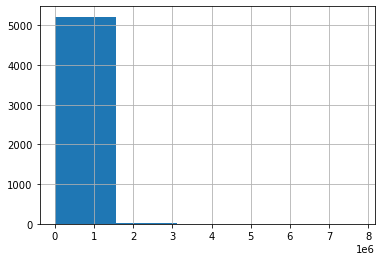

In [453]:
inner_join['salary'].hist(bins = 5)

(array([ 20., 302., 511., 356., 337., 260., 225., 199., 187., 173., 139.,
        160.]),
 array([    0,  5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000,
        45000, 50000, 55000, 60000]),
 <BarContainer object of 12 artists>)

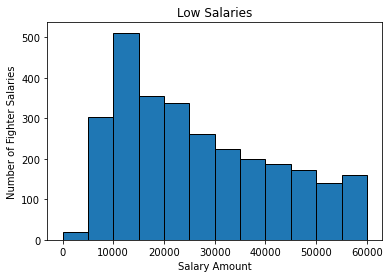

In [454]:
bins2 = [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000, 55000, 60000]

plt.title('Low Salaries')
plt.xlabel('Salary Amount')
plt.ylabel('Number of Fighter Salaries')
plt.hist(inner_join['salary'], bins = bins2, 
                                 edgecolor = 'black')



In [455]:
below_60000 = inner_join.loc[inner_join['salary'] <= 60000]

In [456]:
below_60000

,fighter,salary,year,Unnamed: 0,first_name,last_name,height,weight,stance,wins,losses,draws,number_of_fights,full_name,gender,current_or_former_champ,win_percentage
79,Chris Leben,51000,2012,52,Chris,Leben,"5' 11""",185.0,Southpaw,22,11,0,33,Chris Leben,m,f,66.666667
80,Chris Leben,51000,2013,52,Chris,Leben,"5' 11""",185.0,Southpaw,22,11,0,33,Chris Leben,m,f,66.666667
110,Carlos Condit,59000,2014,164,Carlos,Condit,"6' 2""",170.0,Orthodox,32,14,0,46,Carlos Condit,m,t,69.565217
111,Carlos Condit,59000,2015,164,Carlos,Condit,"6' 2""",170.0,Orthodox,32,14,0,46,Carlos Condit,m,t,69.565217
164,Yoshihiro Akiyama,45000,2011,27,Yoshihiro,Akiyama,"5' 10""",170.0,Orthodox,14,6,0,20,Yoshihiro Akiyama,m,f,70.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5232,TJ Laramie,13500,2020,25,TJ,Laramie,"5' 6""",145.0,Orthodox,12,4,0,16,TJ Laramie,m,f,75.000000
5233,Timur Valiev,13500,2020,5,Timur,Valiev,"5' 6""",135.0,Orthodox,18,2,0,20,Timur Valiev,m,f,90.000000
5234,Victor Rodriguez,13500,2020,138,Victor,Rodriguez,"5' 5""",125.0,Switch,7,4,0,11,Victor Rodriguez,m,f,63.636364
5235,Vince Cachero,13500,2020,3,Vince,Cachero,"5' 6""",145.0,Orthodox,7,4,0,11,Vince Cachero,m,f,63.636364


In [457]:
2869/5237

0.5478327286614474

In [458]:
female_df = inner_join.loc[inner_join['gender'] == 'f']

In [459]:
female_df

,fighter,salary,year,Unnamed: 0,first_name,last_name,height,weight,stance,wins,losses,draws,number_of_fights,full_name,gender,current_or_former_champ,win_percentage
2235,Ronda Rousey,330000,2014,175,Ronda,Rousey,"5' 7""",135.0,Orthodox,12,2,0,14,Ronda Rousey,f,t,85.714286
2236,Ronda Rousey,575000,2015,175,Ronda,Rousey,"5' 7""",135.0,Orthodox,12,2,0,14,Ronda Rousey,f,t,85.714286
2237,Ronda Rousey,3030000,2016,175,Ronda,Rousey,"5' 7""",135.0,Orthodox,12,2,0,14,Ronda Rousey,f,t,85.714286
2326,Miesha Tate,122000,2014,28,Miesha,Tate,"5' 6""",135.0,Orthodox,19,8,0,27,Miesha Tate,f,t,70.370370
2327,Miesha Tate,161000,2015,28,Miesha,Tate,"5' 6""",135.0,Orthodox,19,8,0,27,Miesha Tate,f,t,70.370370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5128,Kay Hansen,101000,2020,28,Kay,Hansen,"5' 2""",115.0,Orthodox,7,4,0,11,Kay Hansen,f,f,63.636364
5132,Mariya Agapova,89000,2020,17,Mariya,Agapova,"5' 6""",125.0,Southpaw,10,2,0,12,Mariya Agapova,f,f,83.333333
5170,Jinh Yu Frey,35000,2020,101,Jinh Yu,Frey,"5' 3""",115.0,Southpaw,11,6,0,17,Jinh Yu Frey,f,f,64.705882
5188,Miranda Maverick,23500,2020,123,Miranda,Maverick,"5' 3""",125.0,Southpaw,11,3,0,14,Miranda Maverick,f,f,78.571429


In [460]:
male_df = inner_join.loc[inner_join['gender'] == 'm']

In [461]:
male_df

,fighter,salary,year,Unnamed: 0,first_name,last_name,height,weight,stance,wins,losses,draws,number_of_fights,full_name,gender,current_or_former_champ,win_percentage
0,Michael Bisping,915000,2010,114,Michael,Bisping,"6' 1""",185.0,Orthodox,30,9,0,39,Michael Bisping,m,t,76.923077
1,Michael Bisping,810000,2011,114,Michael,Bisping,"6' 1""",185.0,Orthodox,30,9,0,39,Michael Bisping,m,t,76.923077
2,Michael Bisping,700000,2012,114,Michael,Bisping,"6' 1""",185.0,Orthodox,30,9,0,39,Michael Bisping,m,t,76.923077
3,Michael Bisping,700000,2013,114,Michael,Bisping,"6' 1""",185.0,Orthodox,30,9,0,39,Michael Bisping,m,t,76.923077
4,Michael Bisping,975000,2014,114,Michael,Bisping,"6' 1""",185.0,Orthodox,30,9,0,39,Michael Bisping,m,t,76.923077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5232,TJ Laramie,13500,2020,25,TJ,Laramie,"5' 6""",145.0,Orthodox,12,4,0,16,TJ Laramie,m,f,75.000000
5233,Timur Valiev,13500,2020,5,Timur,Valiev,"5' 6""",135.0,Orthodox,18,2,0,20,Timur Valiev,m,f,90.000000
5234,Victor Rodriguez,13500,2020,138,Victor,Rodriguez,"5' 5""",125.0,Switch,7,4,0,11,Victor Rodriguez,m,f,63.636364
5235,Vince Cachero,13500,2020,3,Vince,Cachero,"5' 6""",145.0,Orthodox,7,4,0,11,Vince Cachero,m,f,63.636364


In [462]:
male_df['fighter'].nunique()

1470

In [463]:
female_df['fighter'].nunique()

139

In [464]:
male_df

,fighter,salary,year,Unnamed: 0,first_name,last_name,height,weight,stance,wins,losses,draws,number_of_fights,full_name,gender,current_or_former_champ,win_percentage
0,Michael Bisping,915000,2010,114,Michael,Bisping,"6' 1""",185.0,Orthodox,30,9,0,39,Michael Bisping,m,t,76.923077
1,Michael Bisping,810000,2011,114,Michael,Bisping,"6' 1""",185.0,Orthodox,30,9,0,39,Michael Bisping,m,t,76.923077
2,Michael Bisping,700000,2012,114,Michael,Bisping,"6' 1""",185.0,Orthodox,30,9,0,39,Michael Bisping,m,t,76.923077
3,Michael Bisping,700000,2013,114,Michael,Bisping,"6' 1""",185.0,Orthodox,30,9,0,39,Michael Bisping,m,t,76.923077
4,Michael Bisping,975000,2014,114,Michael,Bisping,"6' 1""",185.0,Orthodox,30,9,0,39,Michael Bisping,m,t,76.923077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5232,TJ Laramie,13500,2020,25,TJ,Laramie,"5' 6""",145.0,Orthodox,12,4,0,16,TJ Laramie,m,f,75.000000
5233,Timur Valiev,13500,2020,5,Timur,Valiev,"5' 6""",135.0,Orthodox,18,2,0,20,Timur Valiev,m,f,90.000000
5234,Victor Rodriguez,13500,2020,138,Victor,Rodriguez,"5' 5""",125.0,Switch,7,4,0,11,Victor Rodriguez,m,f,63.636364
5235,Vince Cachero,13500,2020,3,Vince,Cachero,"5' 6""",145.0,Orthodox,7,4,0,11,Vince Cachero,m,f,63.636364


In [465]:
male_df_groupby_year = male_df.groupby(['year'])

In [466]:
male_df_groupby_fighter.sum()

,Unnamed: 0,wins,losses,draws,number_of_fights
year,,,,,
2010,28116,5075,2262,76,7413
2011,35438,6259,2792,82,9133
2012,38415,6942,3048,98,10088
2013,38415,6942,3048,98,10088
2014,51508,8993,3657,142,12792
2015,52936,8832,3497,124,12453
2016,52575,8446,3218,108,11772
2017,49563,7807,2930,90,10827
2018,53115,7915,2843,83,10841


In [467]:
female_df

,fighter,salary,year,Unnamed: 0,first_name,last_name,height,weight,stance,wins,losses,draws,number_of_fights,full_name,gender,current_or_former_champ,win_percentage
2235,Ronda Rousey,330000,2014,175,Ronda,Rousey,"5' 7""",135.0,Orthodox,12,2,0,14,Ronda Rousey,f,t,85.714286
2236,Ronda Rousey,575000,2015,175,Ronda,Rousey,"5' 7""",135.0,Orthodox,12,2,0,14,Ronda Rousey,f,t,85.714286
2237,Ronda Rousey,3030000,2016,175,Ronda,Rousey,"5' 7""",135.0,Orthodox,12,2,0,14,Ronda Rousey,f,t,85.714286
2326,Miesha Tate,122000,2014,28,Miesha,Tate,"5' 6""",135.0,Orthodox,19,8,0,27,Miesha Tate,f,t,70.370370
2327,Miesha Tate,161000,2015,28,Miesha,Tate,"5' 6""",135.0,Orthodox,19,8,0,27,Miesha Tate,f,t,70.370370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5128,Kay Hansen,101000,2020,28,Kay,Hansen,"5' 2""",115.0,Orthodox,7,4,0,11,Kay Hansen,f,f,63.636364
5132,Mariya Agapova,89000,2020,17,Mariya,Agapova,"5' 6""",125.0,Southpaw,10,2,0,12,Mariya Agapova,f,f,83.333333
5170,Jinh Yu Frey,35000,2020,101,Jinh Yu,Frey,"5' 3""",115.0,Southpaw,11,6,0,17,Jinh Yu Frey,f,f,64.705882
5188,Miranda Maverick,23500,2020,123,Miranda,Maverick,"5' 3""",125.0,Southpaw,11,3,0,14,Miranda Maverick,f,f,78.571429


In [468]:
inner_join['salary'].min()

3000

In [469]:
inner_join['salary'].max()

7770000

In [470]:
line_plot_men = male_df.groupby(['year'], sort=True)[['salary']].mean()

<AxesSubplot:xlabel='year'>

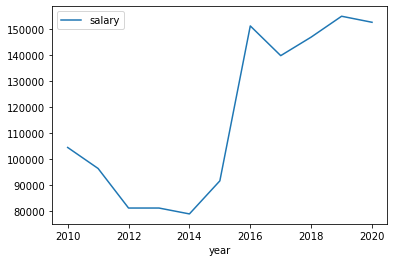

In [471]:
line_plot_men.plot.line()

In [472]:
line_plot_women = female_df.groupby(['year'], sort=True)[['salary']].mean()

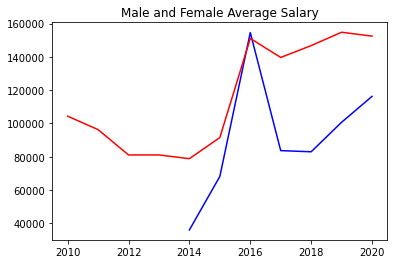

In [473]:
plt.title('Male and Female Average Salary')
plt.plot(line_plot_women, color = 'blue')
plt.plot(line_plot_men, color = 'red');


In [474]:
female_df.loc[female_df['year'] == 2016]

,fighter,salary,year,Unnamed: 0,first_name,last_name,height,weight,stance,wins,losses,draws,number_of_fights,full_name,gender,current_or_former_champ,win_percentage
2237,Ronda Rousey,3030000,2016,175,Ronda,Rousey,"5' 7""",135.0,Orthodox,12,2,0,14,Ronda Rousey,f,t,85.714286
2328,Miesha Tate,772000,2016,28,Miesha,Tate,"5' 6""",135.0,Orthodox,19,8,0,27,Miesha Tate,f,t,70.370370
2362,Carla Esparza,62500,2016,63,Carla,Esparza,"5' 1""",115.0,Orthodox,19,6,0,25,Carla Esparza,f,t,76.000000
2511,Jessica Penne,22500,2016,75,Jessica,Penne,"5' 5""",115.0,Orthodox,14,6,0,20,Jessica Penne,f,f,70.000000
2522,Paige VanZant,132500,2016,19,Paige,VanZant,"5' 4""",115.0,Orthodox,8,5,0,13,Paige VanZant,f,f,61.538462
2568,Kailin Curran,45000,2016,245,Kailin,Curran,"5' 4""",115.0,Orthodox,4,5,0,9,Kailin Curran,f,f,44.444444
2576,Randa Markos,40600,2016,71,Randa,Markos,"5' 4""",115.0,Orthodox,11,12,1,24,Randa Markos,f,f,45.833333
2589,Alexis Davis,32000,2016,36,Alexis,Davis,"5' 6""",135.0,Orthodox,20,11,0,31,Alexis Davis,f,f,64.516129
2613,Sara McMann,166000,2016,170,Sara,McMann,"5' 6""",135.0,Orthodox,12,6,0,18,Sara McMann,f,f,66.666667
2667,Bethe Correia,80000,2016,189,Bethe,Correia,"5' 5""",135.0,Orthodox,11,6,1,18,Bethe Correia,f,f,61.111111


In [475]:
line_plot = inner_join.groupby(['year'], sort=True)[['salary']].mean()

<AxesSubplot:xlabel='year'>

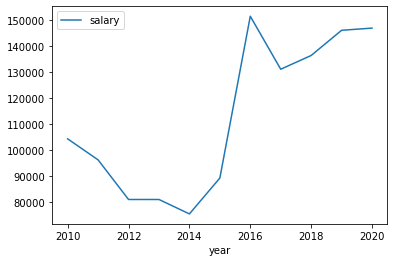

In [476]:
line_plot.plot.line()

In [477]:
male_df['salary'].mean()

118594.76617336152

In [478]:
female_df['salary'].mean()

94612.24852071005

In [479]:
inner_join['weight']

0       185.0
1       185.0
2       185.0
3       185.0
4       185.0
        ...  
5232    145.0
5233    135.0
5234    125.0
5235    145.0
5236    145.0
Name: weight, Length: 5237, dtype: float64

In [480]:
inner_join.dtypes

fighter                     object
salary                       int64
year                         int64
Unnamed: 0                   int64
first_name                  object
last_name                   object
height                      object
weight                     float64
stance                      object
wins                         int64
losses                       int64
draws                        int64
number_of_fights             int64
full_name                   object
gender                      object
current_or_former_champ     object
win_percentage             float64
dtype: object

In [481]:
inner_join['weight'] = inner_join['weight'].astype(int)

ValueError: Cannot convert non-finite values (NA or inf) to integer

In [482]:
inner_join.dropna(inplace=True)

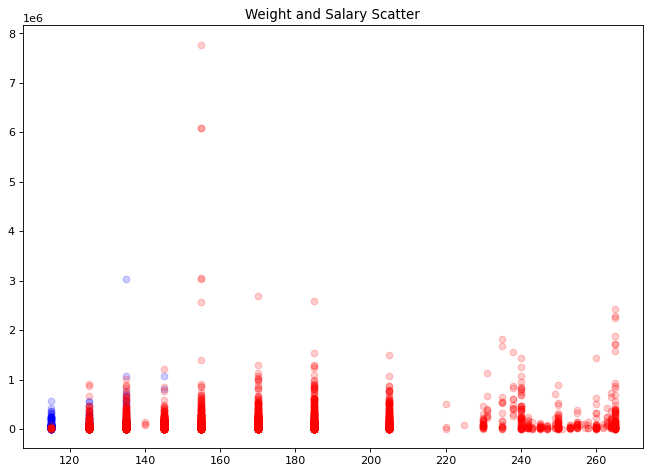

In [483]:
figure(figsize=(10, 7), dpi=80)
plt.title('Weight and Salary Scatter')
x = plt.scatter(female_df['weight'],female_df['salary'],color='blue', alpha=0.2)
y = plt.scatter(male_df['weight'],male_df['salary'],color='red', alpha=0.2)
plt.show()

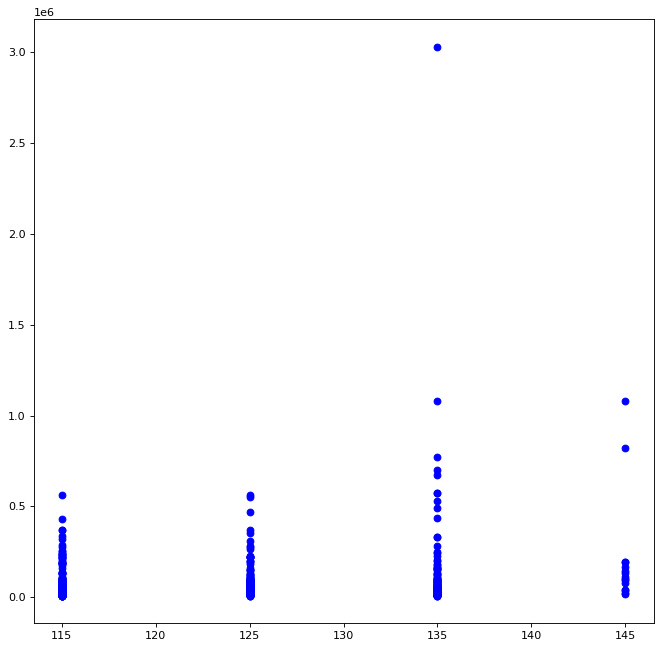

In [484]:
figure(figsize=(10, 10), dpi=80)
plt.scatter(female_df['weight'],female_df['salary'],color='blue')

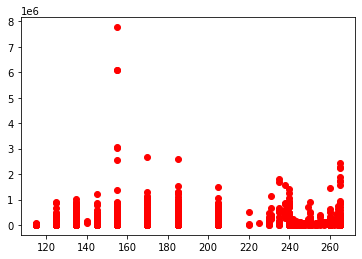

In [485]:
plt.scatter(male_df['weight'],male_df['salary'],color='red')

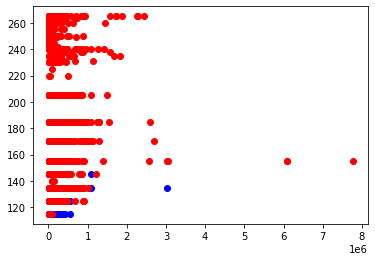

In [486]:
plt.scatter(female_df['salary'],female_df['weight'],color='blue')
plt.scatter(male_df['salary'],male_df['weight'],color='red')
plt.show()

In [487]:
x2 = [inner_join['weight']]
y2 = [inner_join['salary']]
slope, intercept, r_value, p_value, std_err = linregress(x, y)

TypeError: len() of unsized object

In [ ]:
correlation = inner_join['weight'].corr(inner_join['salary'])
correlation

In [488]:
instagram_df = pd.read_csv('../data/instagram_followers.csv')

In [519]:
instagram_df.head(20)

,fighter,insta_followers
0,Conor McGregor,43095580
1,Khabib Nurmagomedov,31922280
2,Ronda Rousey,13842894
3,Jon Bones Jones,5863412
4,Israel Adesanya,5420802
5,Nate Diaz,5161922
6,Anderson The Spider Silva,3801605
7,Dustin Poirier,3691922
8,Georges St-Pierre,3486422
9,Zubaira Tukhugov,3373818


In [497]:
inner_join_insta = pd.merge(inner_join ,instagram_df,left_on='fighter', right_on='fighter')

In [498]:
inner_join_insta

,fighter,salary,year,Unnamed: 0,first_name,last_name,height,weight,stance,wins,losses,draws,number_of_fights,full_name,gender,current_or_former_champ,win_percentage,insta_followers
0,Georges St-Pierre,900000,2010,319,Georges,St-Pierre,"5' 11""",185.0,Orthodox,26,2,0,28,Georges St-Pierre,m,t,92.857143,3486422
1,Georges St-Pierre,400000,2011,319,Georges,St-Pierre,"5' 11""",185.0,Orthodox,26,2,0,28,Georges St-Pierre,m,t,92.857143,3486422
2,Georges St-Pierre,470000,2012,319,Georges,St-Pierre,"5' 11""",185.0,Orthodox,26,2,0,28,Georges St-Pierre,m,t,92.857143,3486422
3,Georges St-Pierre,470000,2013,319,Georges,St-Pierre,"5' 11""",185.0,Orthodox,26,2,0,28,Georges St-Pierre,m,t,92.857143,3486422
4,Georges St-Pierre,2580000,2017,319,Georges,St-Pierre,"5' 11""",185.0,Orthodox,26,2,0,28,Georges St-Pierre,m,t,92.857143,3486422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,Amanda Ribas,67500,2020,64,Amanda,Ribas,"5' 3""",125.0,Orthodox,11,2,0,13,Amanda Ribas,f,f,84.615385,802511
506,Rodolfo Vieira,23500,2019,57,Rodolfo,Vieira,"6' 0""",185.0,Orthodox,8,1,0,9,Rodolfo Vieira,m,f,88.888889,328052
507,Rodolfo Vieira,31500,2020,57,Rodolfo,Vieira,"6' 0""",185.0,Orthodox,8,1,0,9,Rodolfo Vieira,m,f,88.888889,328052
508,Khamzat Chimaev,294500,2020,109,Khamzat,Chimaev,"6' 2""",170.0,Orthodox,10,0,0,10,Khamzat Chimaev,m,f,100.000000,2743422


In [589]:
inner_join_insta.to_csv('../data/inner_join_insta.csv')

In [593]:
inner_join_insta_summed_salary.to_csv('../data/inner_join_insta_summed_salary.csv')

In [592]:
inner_join_insta_summed_salary = inner_join_insta.groupby(['fighter']).sum()

In [588]:
inner_join_insta['fighter'].unique()

array(['Georges St-Pierre', 'Cain Velasquez', 'Lyoto Machida',
       'Junior dos Santos', 'Carlos Condit', 'Nate Diaz', 'Frankie Edgar',
       'Rafael dos Anjos', 'Charles Oliveira', 'Rory MacDonald',
       'Vitor Belfort', 'Donald Cerrone', 'Alistair Overeem',
       'Dominick Cruz', 'Chris Weidman', 'Tony Ferguson',
       'Demetrious Johnson', 'Dustin Poirier', 'Anthony Pettis',
       'Cub Swanson', 'Stipe Miocic', 'T.J. Dillashaw',
       'Stephen Thompson', 'Max Holloway', 'Khabib Nurmagomedov',
       'Robert Whittaker', 'Luke Rockhold', 'Tyron Woodley',
       'Daniel Cormier', 'Ronda Rousey', 'Conor McGregor',
       'Jorge Masvidal', 'Yoel Romero', 'Kelvin Gastelum', 'Miesha Tate',
       'Gilbert Burns', 'Paige VanZant', 'Derrick Lewis',
       'Jan Blachowicz', 'Jessica Andrade', 'Kevin Lee',
       'Aljamain Sterling', 'Colby Covington', 'Zubaira Tukhugov',
       'Thiago Santos', 'Claudia Gadelha', 'Dan Hooker', 'Rose Namajunas',
       'Uriah Hall', 'Brian Ortega', 'M

df.groupby(['A','C'])['B'].sum()

In [508]:
inner_join_insta_grouped = inner_join_insta.groupby(['fighter'])['salary'].sum()

In [510]:
inner_join_insta_grouped 

fighter
Abu Azaitar                 23500
Alexa Grasso               241100
Alexander Volkanovski     1224500
Alexander Volkov           747500
Alistair Overeem         10078071
                           ...   
Valentina Shevchenko      1689000
Vitor Belfort             4363000
Yoel Romero               2287000
Zabit Magomedsharipov      555500
Zubaira Tukhugov           150400
Name: salary, Length: 84, dtype: int64

In [515]:
inner_join['life_salary'] = inner_join.groupby(['fighter']['salary'])

<>:1: SyntaxWarning: list indices must be integers or slices, not str; perhaps you missed a comma?
<>:1: SyntaxWarning: list indices must be integers or slices, not str; perhaps you missed a comma?
<ipython-input-515-6a0bc8037f0b>:1: SyntaxWarning: list indices must be integers or slices, not str; perhaps you missed a comma?
  inner_join['life_salary'] = inner_join.groupby(['fighter']['salary'])


TypeError: list indices must be integers or slices, not str

In [516]:
inner_join['life_salary'].groupby(inner_join['fighter']).transform('sum')

KeyError: 'life_salary'

In [514]:
df_life_salary

,fighter,lifetime_salary


In [509]:
inner_join_insta_grouped.sort_values('insta_followers')

ValueError: No axis named insta_followers for object type Series

KeyError: 'insta_followers'

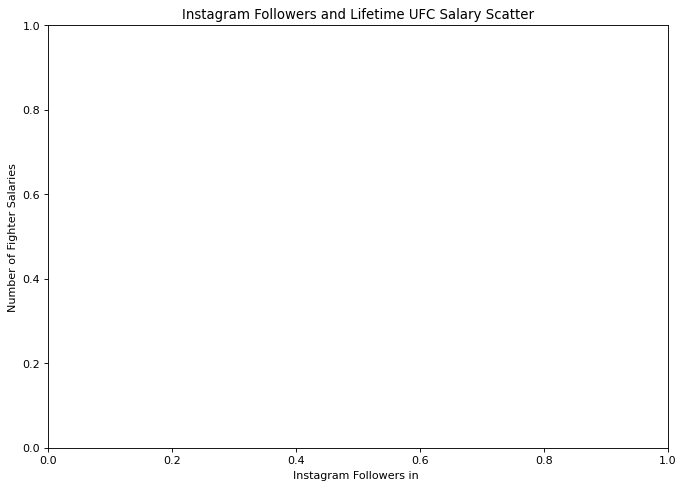

In [511]:
figure(figsize=(10, 7), dpi=80)
plt.title('Instagram Followers and Lifetime UFC Salary Scatter')
plt.xlabel('Instagram Followers in ')
plt.ylabel('Number of Fighter Salaries')
x = plt.scatter(inner_join_insta_grouped['insta_followers'],inner_join_insta_grouped ,color='blue', alpha=0.2)
plt.show()

In [520]:
inner_join

,fighter,salary,year,Unnamed: 0,first_name,last_name,height,weight,stance,wins,losses,draws,number_of_fights,full_name,gender,current_or_former_champ,win_percentage
0,Michael Bisping,915000,2010,114,Michael,Bisping,"6' 1""",185.0,Orthodox,30,9,0,39,Michael Bisping,m,t,76.923077
1,Michael Bisping,810000,2011,114,Michael,Bisping,"6' 1""",185.0,Orthodox,30,9,0,39,Michael Bisping,m,t,76.923077
2,Michael Bisping,700000,2012,114,Michael,Bisping,"6' 1""",185.0,Orthodox,30,9,0,39,Michael Bisping,m,t,76.923077
3,Michael Bisping,700000,2013,114,Michael,Bisping,"6' 1""",185.0,Orthodox,30,9,0,39,Michael Bisping,m,t,76.923077
4,Michael Bisping,975000,2014,114,Michael,Bisping,"6' 1""",185.0,Orthodox,30,9,0,39,Michael Bisping,m,t,76.923077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5232,TJ Laramie,13500,2020,25,TJ,Laramie,"5' 6""",145.0,Orthodox,12,4,0,16,TJ Laramie,m,f,75.000000
5233,Timur Valiev,13500,2020,5,Timur,Valiev,"5' 6""",135.0,Orthodox,18,2,0,20,Timur Valiev,m,f,90.000000
5234,Victor Rodriguez,13500,2020,138,Victor,Rodriguez,"5' 5""",125.0,Switch,7,4,0,11,Victor Rodriguez,m,f,63.636364
5235,Vince Cachero,13500,2020,3,Vince,Cachero,"5' 6""",145.0,Orthodox,7,4,0,11,Vince Cachero,m,f,63.636364


In [522]:
champs_df = inner_join.loc[inner_join['current_or_former_champ'] == 't']

In [550]:
nonchamps_df = inner_join.loc[inner_join['current_or_former_champ'] == 'f']

In [551]:
nonchamps_df

,fighter,salary,year,Unnamed: 0,first_name,last_name,height,weight,stance,wins,losses,draws,number_of_fights,full_name,gender,current_or_former_champ,win_percentage
44,James Toney,500000,2010,84,James,Toney,"5' 9""",220.0,Orthodox,0,1,0,1,James Toney,m,f,0.000000
49,Mirko Cro Cop,460000,2010,42,Mirko,Filipovic,"6' 2""",230.0,Southpaw,35,11,2,48,Mirko Cro Cop,m,f,72.916667
50,Mirko Cro Cop,150000,2011,42,Mirko,Filipovic,"6' 2""",230.0,Southpaw,35,11,2,48,Mirko Cro Cop,m,f,72.916667
77,Chris Leben,316000,2010,52,Chris,Leben,"5' 11""",185.0,Southpaw,22,11,0,33,Chris Leben,m,f,66.666667
78,Chris Leben,184000,2011,52,Chris,Leben,"5' 11""",185.0,Southpaw,22,11,0,33,Chris Leben,m,f,66.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5232,TJ Laramie,13500,2020,25,TJ,Laramie,"5' 6""",145.0,Orthodox,12,4,0,16,TJ Laramie,m,f,75.000000
5233,Timur Valiev,13500,2020,5,Timur,Valiev,"5' 6""",135.0,Orthodox,18,2,0,20,Timur Valiev,m,f,90.000000
5234,Victor Rodriguez,13500,2020,138,Victor,Rodriguez,"5' 5""",125.0,Switch,7,4,0,11,Victor Rodriguez,m,f,63.636364
5235,Vince Cachero,13500,2020,3,Vince,Cachero,"5' 6""",145.0,Orthodox,7,4,0,11,Vince Cachero,m,f,63.636364


In [553]:
nonchamps_since_2013 = nonchamps_df.loc[nonchamps_df['year'] >= 2013]

In [554]:
nonchamps_gender_count = nonchamps_since_2013.value_counts('gender')

In [555]:
nonchamps_gender_count

gender
m    3418
f     427
dtype: int64

In [529]:
champs_since_2013 = champs_df.loc[champs_df['year'] >= 2013]

In [536]:
champs_since_2013 

,fighter,salary,year,Unnamed: 0,first_name,last_name,height,weight,stance,wins,losses,draws,number_of_fights,full_name,gender,current_or_former_champ,win_percentage
3,Michael Bisping,700000,2013,114,Michael,Bisping,"6' 1""",185.0,Orthodox,30,9,0,39,Michael Bisping,m,t,76.923077
4,Michael Bisping,975000,2014,114,Michael,Bisping,"6' 1""",185.0,Orthodox,30,9,0,39,Michael Bisping,m,t,76.923077
5,Michael Bisping,870000,2015,114,Michael,Bisping,"6' 1""",185.0,Orthodox,30,9,0,39,Michael Bisping,m,t,76.923077
6,Michael Bisping,990000,2016,114,Michael,Bisping,"6' 1""",185.0,Orthodox,30,9,0,39,Michael Bisping,m,t,76.923077
7,Michael Bisping,810000,2017,114,Michael,Bisping,"6' 1""",185.0,Orthodox,30,9,0,39,Michael Bisping,m,t,76.923077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4660,Zhang Weili,67000,2018,17,Zhang,Weili,"5' 4""",115.0,Switch,21,3,0,24,Zhang Weili,f,t,87.500000
4661,Zhang Weili,219500,2019,17,Zhang,Weili,"5' 4""",115.0,Switch,21,3,0,24,Zhang Weili,f,t,87.500000
4662,Zhang Weili,290000,2020,17,Zhang,Weili,"5' 4""",115.0,Switch,21,3,0,24,Zhang Weili,f,t,87.500000
4879,Ciryl Gane,132500,2019,25,Ciryl,Gane,"6' 4""",245.0,Orthodox,10,0,0,10,Ciryl Gane,m,t,100.000000


In [531]:
champ_gender_count = champs_since_2013.value_counts('gender')

In [566]:
champ_gender_count

gender
m    319
f     72
dtype: int64

In [568]:
nonchamps_gender_count

gender
m    3418
f     427
dtype: int64

In [548]:
champs_avg_salary = champs_since_2013.groupby(['gender'])['salary'].mean()

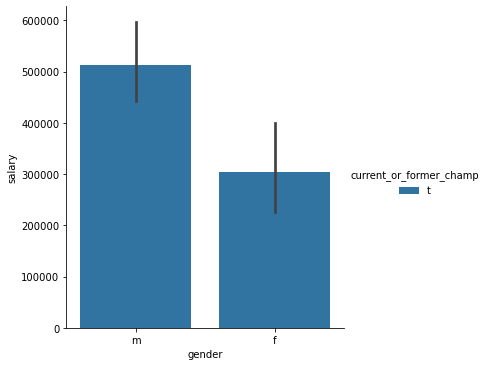

In [538]:
group_labels = ['Champs', 'Non-champs']

sns.catplot(x = "gender", y = "salary", hue = "current_or_former_champ",
            data = champs_since_2013,   
            kind = "bar")

<AxesSubplot:xlabel='gender'>

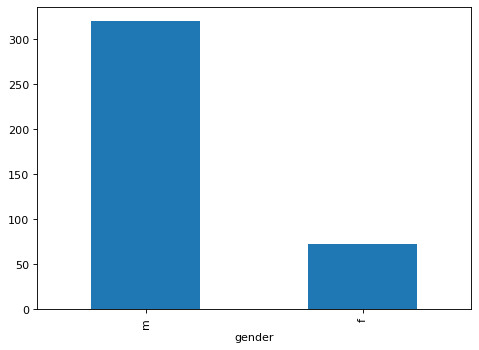

In [565]:

plt.title('Male vs Female')
figure(figsize=(7, 5), dpi=80)
champ_gender_count.plot(kind='bar')


In [562]:
nonchamp_gender_count.plot(kind='bar')

NameError: name 'nonchamp_gender_count' is not defined

AttributeError: 'Line2D' object has no property 'kine'

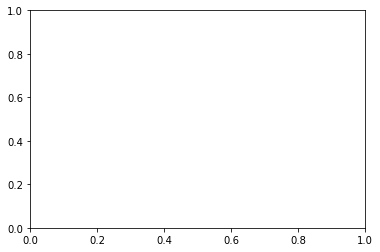

In [563]:
nonchamps_gender_count.plot(kine='bar')

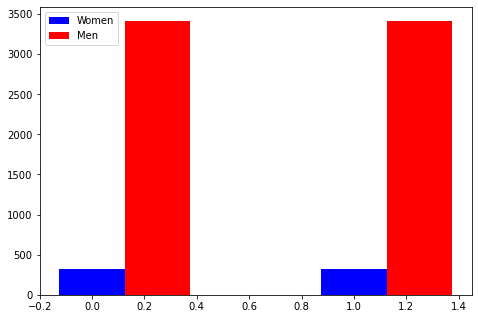

In [561]:
data = [319,3418]
[72, 427]
X = np.arange(2)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'b', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'r', width = 0.25)
ax.legend(labels=['Women', 'Men'])

In [569]:
inner_join

,fighter,salary,year,Unnamed: 0,first_name,last_name,height,weight,stance,wins,losses,draws,number_of_fights,full_name,gender,current_or_former_champ,win_percentage
0,Michael Bisping,915000,2010,114,Michael,Bisping,"6' 1""",185.0,Orthodox,30,9,0,39,Michael Bisping,m,t,76.923077
1,Michael Bisping,810000,2011,114,Michael,Bisping,"6' 1""",185.0,Orthodox,30,9,0,39,Michael Bisping,m,t,76.923077
2,Michael Bisping,700000,2012,114,Michael,Bisping,"6' 1""",185.0,Orthodox,30,9,0,39,Michael Bisping,m,t,76.923077
3,Michael Bisping,700000,2013,114,Michael,Bisping,"6' 1""",185.0,Orthodox,30,9,0,39,Michael Bisping,m,t,76.923077
4,Michael Bisping,975000,2014,114,Michael,Bisping,"6' 1""",185.0,Orthodox,30,9,0,39,Michael Bisping,m,t,76.923077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5232,TJ Laramie,13500,2020,25,TJ,Laramie,"5' 6""",145.0,Orthodox,12,4,0,16,TJ Laramie,m,f,75.000000
5233,Timur Valiev,13500,2020,5,Timur,Valiev,"5' 6""",135.0,Orthodox,18,2,0,20,Timur Valiev,m,f,90.000000
5234,Victor Rodriguez,13500,2020,138,Victor,Rodriguez,"5' 5""",125.0,Switch,7,4,0,11,Victor Rodriguez,m,f,63.636364
5235,Vince Cachero,13500,2020,3,Vince,Cachero,"5' 6""",145.0,Orthodox,7,4,0,11,Vince Cachero,m,f,63.636364


In [571]:
d = {'Gender': ['Male', 'Female'], 'Champs': [319, 72]}

dd = {'Gender': ['Male', 'Female'], 'Nonchamps': [3418, 427]}

In [572]:
new_df= pd.DataFrame(data=d)

<AxesSubplot:>

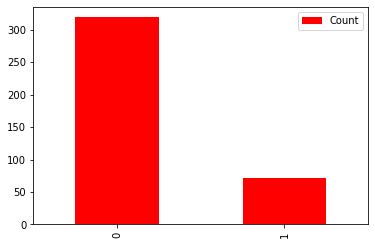

In [576]:
color_list = ['r', 'b']
new_df.plot(kind='bar', color = color_list)

In [578]:
champs_since_2013_m = champs_since_2013.loc[champs_since_2013['gender'] == 'm']

champs_since_2013_f = champs_since_2013.loc[champs_since_2013['gender'] == 'f']

In [580]:
champs_since_2013_m['salary'].mean()

513637.3040752351

In [581]:
champs_since_2013_f['salary'].mean()

304647.22222222225

In [584]:
nonchamps_since_2013_m = nonchamps_since_2013.loc[nonchamps_since_2013['gender'] == 'm']

nonchamps_since_2013_f = nonchamps_since_2013.loc[nonchamps_since_2013['gender'] == 'f']

In [586]:
nonchamps_since_2013_m['salary'].mean()

90043.25043885312

In [585]:
nonchamps_since_2013_f['salary'].mean()

60759.50819672131

In [594]:
inner_join.groupby(['fighter']).mean()

,salary,year,Unnamed: 0,weight,wins,losses,draws,number_of_fights,win_percentage
fighter,,,,,,,,,
Aalon Cruz,13500.000000,2020.0,231.0,145.0,8.0,4.0,0.0,12.0,66.666667
Aaron Phillips,14750.000000,2017.0,120.0,135.0,12.0,4.0,0.0,16.0,75.000000
Aaron Riley,15000.000000,2010.5,79.0,155.0,30.0,14.0,1.0,45.0,66.666667
Aaron Rosa,10000.000000,2012.0,161.0,205.0,18.0,6.0,0.0,24.0,75.000000
Aaron Simpson,91000.000000,2011.5,225.0,170.0,12.0,5.0,0.0,17.0,70.588235
...,...,...,...,...,...,...,...,...,...
Zhalgas Zhumagulov,15900.000000,2020.0,20.0,125.0,14.0,6.0,0.0,20.0,70.000000
Zhang Lipeng,23000.000000,2014.5,16.0,155.0,23.0,9.0,1.0,33.0,69.696970
Zhang Tiequan,12000.000000,2012.5,15.0,155.0,15.0,4.0,0.0,19.0,78.947368


In [599]:
female_df_grouped = female_df.groupby(['fighter']).mean()

In [600]:
male_df_grouped = male_df.groupby(['fighter']).mean()

In [601]:
male_df_grouped

,salary,year,Unnamed: 0,weight,wins,losses,draws,number_of_fights,win_percentage
fighter,,,,,,,,,
Alatengheili,58250.000000,2019.5,33.0,135.0,14.0,8.0,2.0,24.0,58.333333
Sumudaerji,38166.666667,2019.0,388.0,125.0,14.0,4.0,0.0,18.0,77.777778
Aalon Cruz,13500.000000,2020.0,231.0,145.0,8.0,4.0,0.0,12.0,66.666667
Aaron Phillips,14750.000000,2017.0,120.0,135.0,12.0,4.0,0.0,16.0,75.000000
Aaron Riley,15000.000000,2010.5,79.0,155.0,30.0,14.0,1.0,45.0,66.666667
...,...,...,...,...,...,...,...,...,...
Zelim Imadaev,20250.000000,2019.5,9.0,170.0,8.0,3.0,0.0,11.0,72.727273
Zhalgas Zhumagulov,15900.000000,2020.0,20.0,125.0,14.0,6.0,0.0,20.0,70.000000
Zhang Lipeng,23000.000000,2014.5,16.0,155.0,23.0,9.0,1.0,33.0,69.696970


In [603]:
male_df_grouped['number_of_fights'].mean()

21.474149659863947

In [604]:
male_df_grouped['win_percentage'].mean()

72.1292284868177

In [605]:
female_df_grouped['number_of_fights'].mean()

16.14388489208633

In [606]:
female_df_grouped['win_percentage'].mean()

66.50770194351777

In [602]:
female_df_grouped

,salary,year,Unnamed: 0,weight,wins,losses,draws,number_of_fights,win_percentage
fighter,,,,,,,,,
Aisling Daly,24650.000000,2014.5,10.0,115.0,16.0,6.0,0.0,22.0,72.727273
Aleksandra Albu,23333.333333,2017.0,39.0,115.0,3.0,2.0,0.0,5.0,60.000000
Alex Chambers,31050.000000,2016.0,93.0,115.0,5.0,5.0,0.0,10.0,50.000000
Alexa Grasso,48220.000000,2018.0,160.0,125.0,13.0,3.0,0.0,16.0,81.250000
Alexis Davis,67333.333333,2016.5,36.0,135.0,20.0,11.0,0.0,31.0,64.516129
...,...,...,...,...,...,...,...,...,...
Wu Yanan,16500.000000,2018.0,123.0,125.0,11.0,4.0,0.0,15.0,73.333333
Yan Xiaonan,52875.000000,2018.5,12.0,115.0,13.0,2.0,0.0,15.0,86.666667
Yana Kunitskaya,120000.000000,2019.0,131.0,135.0,14.0,6.0,0.0,20.0,70.000000
